In [132]:
import pandas as pd

# 1. Load the dataset into a Pandas DataFrame.

In [133]:
df = pd.read_csv('restaurant_reviews.csv')

# 2. Display the first 10 rows of the dataset.

In [134]:
df.head(10)

,id,restaurant_name,reviewer_name,review_text,rating,date_of_visit,location
0,0,Штрудель,Тимофій Калениченко,Рекомендую це місце для гарного вечора,2,2023-03-14,Буськ
1,1,Львівська мануфактура кави,Володимир Наливайко,Чудова атмосфера та швидке обслуговування.,3,2024-01-12,Буринь
2,2,Друзі,Спас Каденюк,Не вражений обслуговуванням та якістю їжі.,4,2022-05-25,Чигирин
3,3,Львівська майстерня,Яків Цимбалюк,Чудова атмосфера та швидке обслуговування.,3,2023-03-14,Курахове
4,4,Львівська мануфактура кави,Орина Нестеренко,Приємна музика та оригінальний інтер'єр.,3,2023-12-17,Сокаль
5,5,Всі свої,Святослав Павличенко,Завжди свіжі продукти та широкий вибір страв.,5,2022-05-01,Червоносів
6,6,Всі свої,Лариса Яремків,Не вражений обслуговуванням та якістю їжі.,3,2024-02-10,Городище
7,7,Штрудель,Онисим Хорішко,Веселе місце для зустрічей та вечірок.,2,2023-02-15,Васильків
8,8,Реберня,Леонтій Яковенко,Рекомендую це місце для гарного вечора,2,2022-08-06,Соледар
9,9,Всі свої,Устим Шморгун,Приємна музика та оригінальний інтер'єр.,3,2023-11-08,Пустомити


# 3. Set the 'id' column as the index of the dataframe

In [135]:
df.set_index('id', inplace=True)

In [136]:
df.head(10)

,restaurant_name,reviewer_name,review_text,rating,date_of_visit,location
id,,,,,,
0,Штрудель,Тимофій Калениченко,Рекомендую це місце для гарного вечора,2,2023-03-14,Буськ
1,Львівська мануфактура кави,Володимир Наливайко,Чудова атмосфера та швидке обслуговування.,3,2024-01-12,Буринь
2,Друзі,Спас Каденюк,Не вражений обслуговуванням та якістю їжі.,4,2022-05-25,Чигирин
3,Львівська майстерня,Яків Цимбалюк,Чудова атмосфера та швидке обслуговування.,3,2023-03-14,Курахове
4,Львівська мануфактура кави,Орина Нестеренко,Приємна музика та оригінальний інтер'єр.,3,2023-12-17,Сокаль
5,Всі свої,Святослав Павличенко,Завжди свіжі продукти та широкий вибір страв.,5,2022-05-01,Червоносів
6,Всі свої,Лариса Яремків,Не вражений обслуговуванням та якістю їжі.,3,2024-02-10,Городище
7,Штрудель,Онисим Хорішко,Веселе місце для зустрічей та вечірок.,2,2023-02-15,Васильків
8,Реберня,Леонтій Яковенко,Рекомендую це місце для гарного вечора,2,2022-08-06,Соледар


# 4. Check for missing values

In [137]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
restaurant_name    0
reviewer_name      0
review_text        0
rating             0
date_of_visit      0
location           0
dtype: int64


# 5. Ensure all ratings are within the 1 to 5 range

# 5.1. Count the number of rows with rating values outside the range [1, 5]

In [138]:
invalid_ratings_count = ((df['rating'] < 1) | (df['rating'] > 5)).sum()
print(f"Number of rows with invalid rating values: {invalid_ratings_count}")

Number of rows with invalid rating values: 5


# 5.2. Calculate the median rating

In [139]:
median_rating = df['rating'].median()
print(median_rating)

3.0


# 5.3. Replace invalid ratings with the median value

In [140]:
df['rating'] = df['rating'].clip(1, 5).replace({0: median_rating})

# 5.4. Verify that there are no more invalid ratings

In [141]:
invalid_ratings_count = ((df['rating'] < 1) | (df['rating'] > 5)).sum()
print(f"Number of rows with invalid rating values after correction: {invalid_ratings_count}")

Number of rows with invalid rating values after correction: 0


# 6. Create a new column "Review Length" that represents the number of words in the review text.

In [153]:
def count_words(row):
    return len(row['review_text'].split())

df['review_length'] = df.apply(count_words, axis=1)

print(df.head(10))

               restaurant_name         reviewer_name  \
id                                                     
0                     Штрудель   Тимофій Калениченко   
1   Львівська мануфактура кави   Володимир Наливайко   
2                        Друзі          Спас Каденюк   
3          Львівська майстерня         Яків Цимбалюк   
4   Львівська мануфактура кави      Орина Нестеренко   
5                     Всі свої  Святослав Павличенко   
6                     Всі свої        Лариса Яремків   
7                     Штрудель        Онисим Хорішко   
8                      Реберня      Леонтій Яковенко   
9                     Всі свої         Устим Шморгун   

                                      review_text  rating date_of_visit  \
id                                                                        
0          Рекомендую це місце для гарного вечора       2    2023-03-14   
1      Чудова атмосфера та швидке обслуговування.       3    2024-01-12   
2      Не вражений обслугов

# 7. Find the average rating for each restaurant and display the top 10 highest-rated restaurants.

In [154]:
df.groupby("restaurant_name")['rating'].mean().sort_values(ascending=False)

restaurant_name
Копальня кави                 3.342857
Sowa                          3.217391
Львівська мануфактура кави    3.171429
Буфет                         3.137931
Всі свої                      3.111111
Домашка                       3.100000
Реберня                       3.083333
Друзі                         3.000000
Сто років тому вперед         3.000000
Штрудель                      2.935484
Колос                         2.896552
Пʼяна вишня                   2.875000
Shoco                         2.763158
Львівська майстерня           2.680000
Пузата хата                   2.484848
Name: rating, dtype: float64

# 8. Identify the 5 most frequent reviewers and the average rating they give.

# 8.1. Choose the first 5 most frequent reviewers

In [155]:
top_reviewers = df["reviewer_name"].value_counts().head(5) 
print(top_reviewers)

reviewer_name
Богданна Левченко    2
Амалія Величко       2
Орися Черінько       1
Ірина Зінкевич       1
Данило Гайда         1
Name: count, dtype: int64


In [156]:
# I decided to recheck the amount of unique reviewers' name (we can see that we have 499 unique names out of 500)
pd.DataFrame.from_dict({"reviewer_name": df["reviewer_name"].unique()})

,reviewer_name
0,Тимофій Калениченко
1,Володимир Наливайко
2,Спас Каденюк
3,Яків Цимбалюк
4,Орина Нестеренко
...,...
493,Адам Штокало
494,Яків Євдокименко
495,Орися Зінчук
496,Богдан Цюпа


# 8.2. Calculate the average rating for each of the top reviewers

In [157]:
average_ratings_by_reviewer = df[df['reviewer_name'].isin(top_reviewers.index)].groupby('reviewer_name')['rating'].mean()
print(average_ratings_by_reviewer)

reviewer_name
Ірина Зінкевич       3.0
Амалія Величко       3.0
Богданна Левченко    4.5
Данило Гайда         4.0
Орися Черінько       5.0
Name: rating, dtype: float64


# 9. Calculate the average rating per month to see if there is a trend over time.

In [158]:
df['date_of_visit'] = pd.to_datetime(df['date_of_visit'])

average_rating_per_month = df.groupby([df['date_of_visit'].dt.year, df['date_of_visit'].dt.month])['rating'].mean()

print(average_rating_per_month)

date_of_visit  date_of_visit
2022           2                4.500000
               3                2.933333
               4                2.772727
               5                3.100000
               6                3.578947
               7                2.300000
               8                2.894737
               9                2.961538
               10               2.333333
               11               2.736842
               12               3.411765
2023           1                3.307692
               2                2.933333
               3                3.000000
               4                2.722222
               5                2.400000
               6                3.148148
               7                3.000000
               8                2.590909
               9                3.352941
               10               3.277778
               11               3.266667
               12               3.565217
2024           1            

# 10. Find the restaurant with the most reviews.

In [159]:
most_reviews_restaurant = df['restaurant_name'].value_counts().idxmax()
most_reviews_count = df['restaurant_name'].value_counts().max()

print(f"The restaurant with the most reviews is '{most_reviews_restaurant}' with {most_reviews_count} reviews.")

The restaurant with the most reviews is 'Sowa' with 46 reviews.


# 11. Determine the city with the highest average rating.

In [160]:
average_rating_by_city = df.groupby('location')['rating'].mean()
highest_avg_rating_city = average_rating_by_city.idxmax()
highest_avg_rating = average_rating_by_city.max()

print(f"The city with the highest average rating is '{highest_avg_rating_city}' with an average rating of {highest_avg_rating}.")

The city with the highest average rating is 'Ізяслав' with an average rating of 5.0.


# 12. Save the cleaned and manipulated DataFrame to a new CSV file.

In [161]:
df.to_csv("updated_restaurant_reviews.csv")

# 13. Create a list of unique cities and save it new csv file

In [162]:
cities_df = pd.DataFrame.from_dict({'location': df['location'].unique()})
print(cities_df)

         location
0           Буськ
1          Буринь
2         Чигирин
3        Курахове
4          Сокаль
..            ...
307       Ужгород
308       Рубіжне
309       Житомир
310       Славута
311  Новоукраїнка

[312 rows x 1 columns]


In [164]:
cities_df.to_csv('cities.csv')

# Visualization (Optional)

1. Plot the distribution of ratings across all reviews.

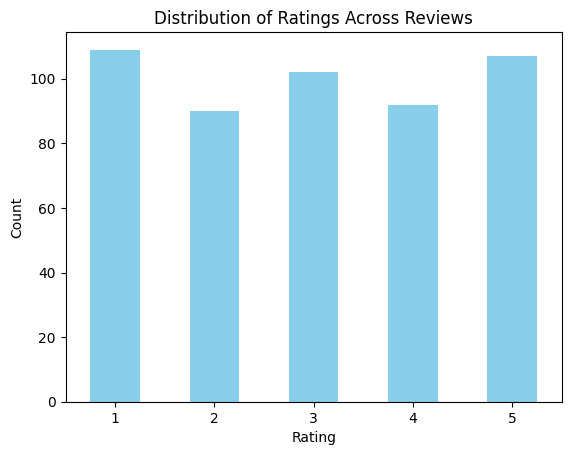

In [178]:
import matplotlib.pyplot as plt

ratings_distribution = df['rating'].value_counts().sort_index()

ratings_distribution.plot(kind='bar', rot=0, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings Across Reviews')
plt.show()


2. Create a time series plot showing the average rating per month.

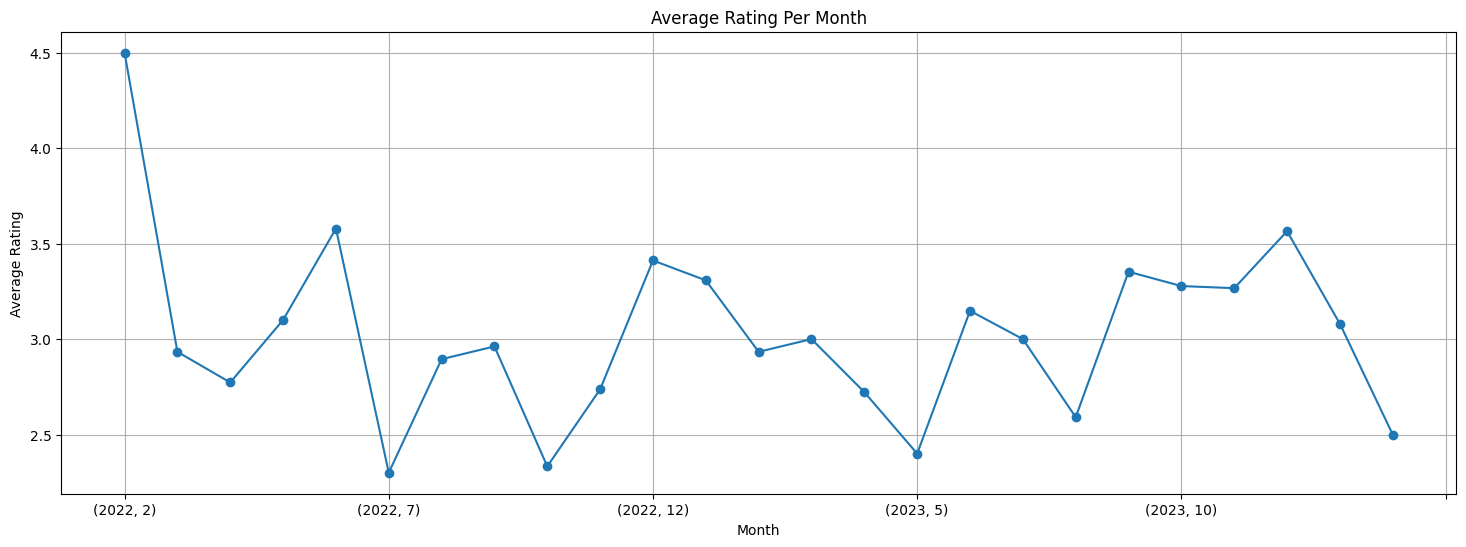

In [179]:
average_rating_per_month.plot(kind='line', marker='o', figsize=(18, 6))
plt.title('Average Rating Per Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()